<a href="https://colab.research.google.com/github/rachelcynthia/DeepLearning-Bootcamp/blob/master/Classification_FMNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
%load_ext tensorboard

import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
print(tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.3.0


Set the seed

In [22]:
from numpy.random import seed
seed(1)

Load the dataset

In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

Create an array of the class names

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Plot one of the images

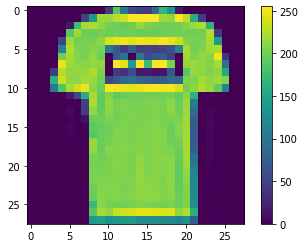

In [25]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar() # the pixels are from 0 to 255
plt.grid(False)
plt.show()

Making images into grayscale

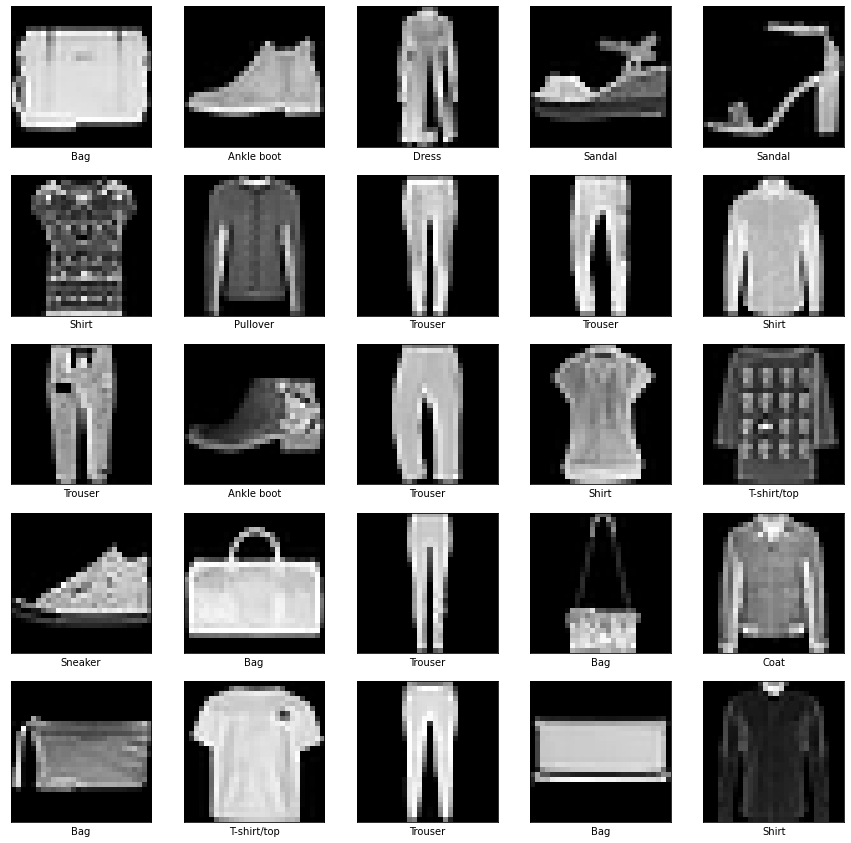

In [26]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  rand_no = random.randint(0,len(x_train))
  plt.imshow(x_train[rand_no],cmap='gray')
  plt.xlabel(class_names[y_train[rand_no]])

Normalize the data

In [27]:
x_train =x_train/255.0
x_test =x_test/255.0

In [28]:
# Clear logs
!rm -rf ./logs/

Creating the model

In [29]:
def create_model():
  model=Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(512,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  return model

Compile and fit the model

In [33]:
model=create_model()
model.summary()
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
log_dir="logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback= TensorBoard(log_dir=log_dir,histogram_freq=1)
earlystopping_callback = EarlyStopping(
    monitor='val_loss',min_delta=0,patience=3,verbose=0,mode='auto',
    baseline=None,restore_best_weights=True
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train,y_train,epochs=20,validation_split=0.2,callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6699 - accuracy: 0.7962 - val_loss: 1.6361 - val_accuracy: 0.8262
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6279 - accuracy: 0.8342 - val_loss: 1.6274 - val_accuracy: 0.8342
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6168 - accuracy: 0.8447 - val_loss: 1.6096 - val_accuracy: 0.8510
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6081 - accuracy: 0.8528 - val_loss: 1.6109 - val_accuracy: 0.8499
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6020 - accuracy: 0.8594 - val_loss: 1.6102 - val_accuracy: 0.8503
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5957 - accuracy: 0.8657 - val_loss: 1.6041 - val_accuracy: 0.8579
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5941 - accuracy: 0.8671 - val_loss: 1.5979 - val_accuracy:

Accuracy

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.5971 - accuracy: 0.8636

Test accuracy: 0.8636000156402588


Predict for test set

In [36]:
predictions = model.predict(x_test)
predictions.shape

(10000, 10)

Bag


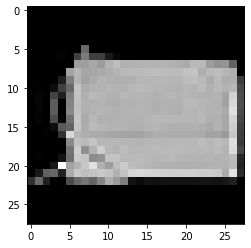

In [39]:
print(class_names[np.argmax(predictions[18])])
plt.imshow(x_test[18],cmap='gray')

In [40]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

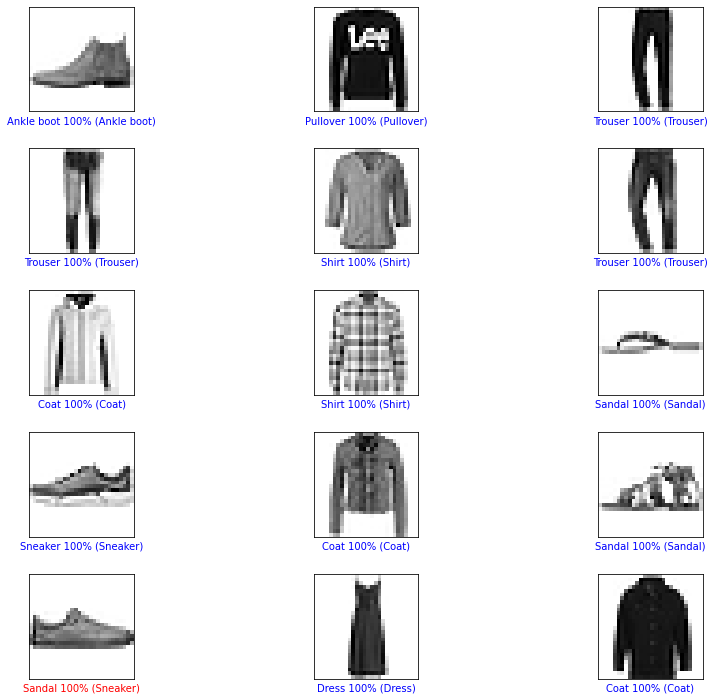

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()